In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### Generating sample data

In [ ]:
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

In [ ]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Moon-shaped Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Determining the epsilon parameter

In [ ]:
# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()


In [ ]:
# Plot k-distance graph
plot_k_distance_graph(X, k=5)

### Performing DBSCAN clustering

In [ ]:
# Perform DBSCAN clustering
epsilon = 0.15  # Chosen based on k-distance graph
min_samples = 5  # 2 * num_features (2D data)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

In [ ]:
type(clusters)

In [ ]:
# Get unique cluster labels
unique_clusters = np.unique(clusters)  
print(unique_clusters)

### Visualizing the results

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Visual comparison

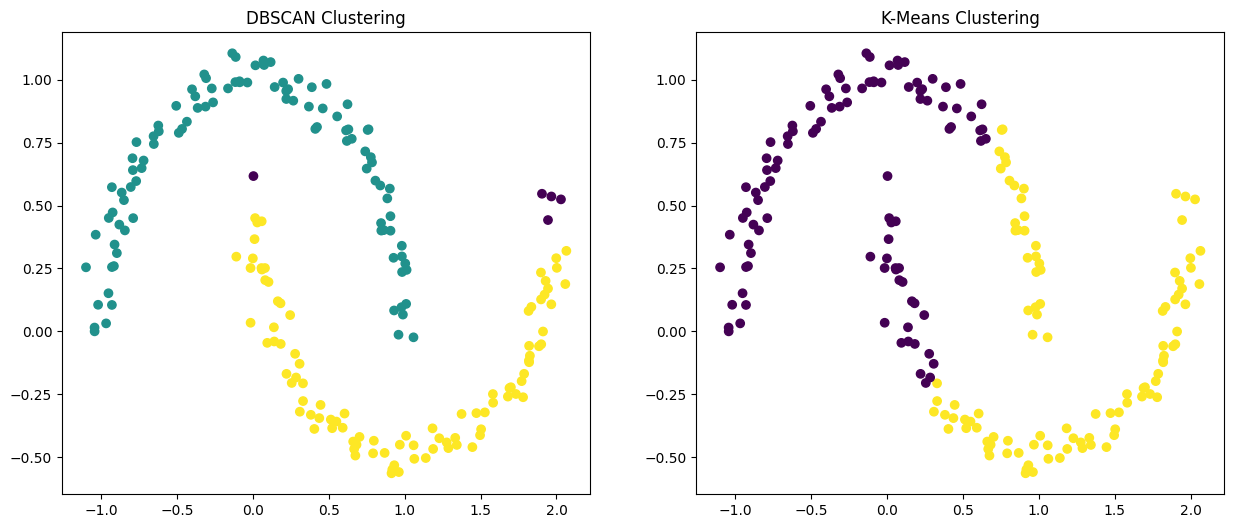

In [18]:
from sklearn.cluster import KMeans

# DBSCAN clustering
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
ax1.set_title('DBSCAN Clustering')

ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax2.set_title('K-Means Clustering')

plt.show()

### 실제 데이터 실습 (with Mall_Customers.csv)

In [13]:
import pandas as pd
import seaborn as sns


In [4]:
df = pd.read_csv('./data/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df['Gender'].value_counts()


Gender
Female    112
Male       88
Name: count, dtype: int64

- Annual income, Spending Score 두개의 Feature에 대한 고객 군집화 수행

In [6]:
from sklearn.preprocessing import StandardScaler

# 두 가지 feature를 대상
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [7]:
# 정규화 진행
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [8]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.5, min_samples=2)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(df_scale)
df_scale['cluster'] = model.fit_predict(df_scale)

In [9]:
df_scale

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,3
196,2.497807,-0.861839,-1
197,2.497807,0.923953,3
198,2.917671,-1.250054,-1


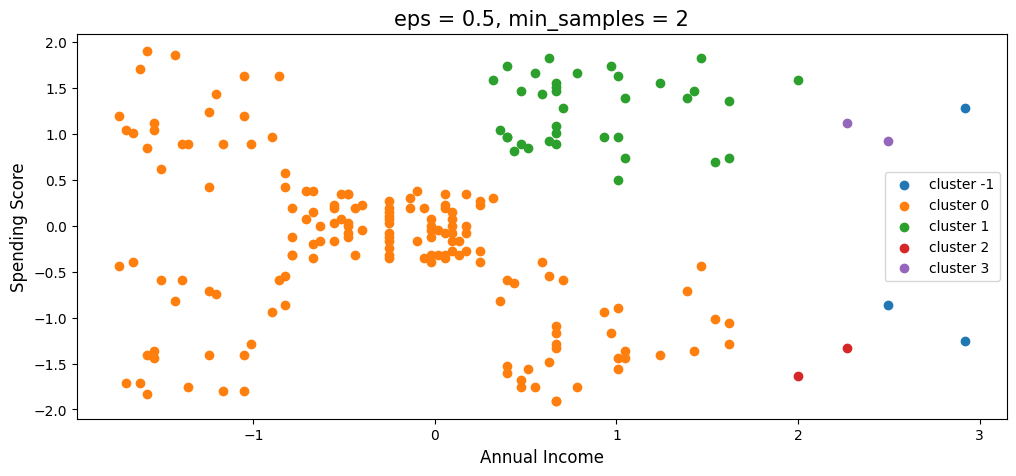

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 5))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, 'Annual Income (k$)'], df_scale.loc[df_scale['cluster'] == i, 'Spending Score (1-100)'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.5, min_samples = 2', size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

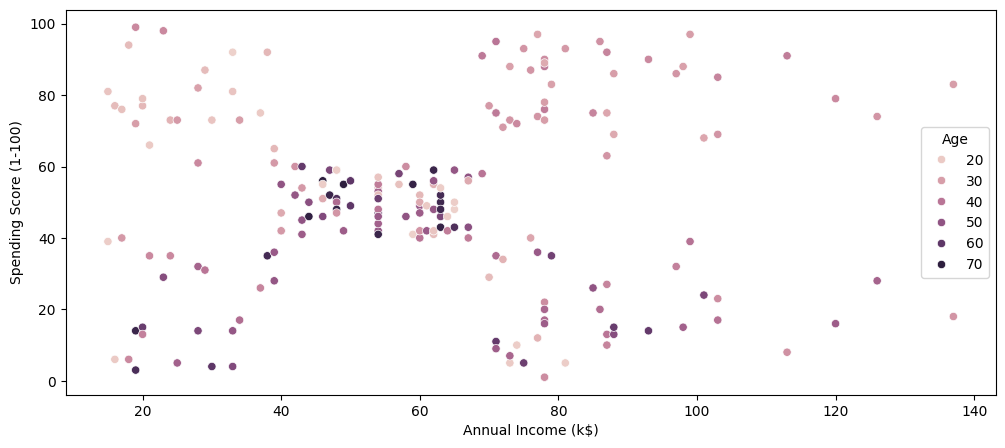

In [16]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Age')

- 5개의 군집이 보이고 있다.

#### 매개변수 조정을 통한 그룹핑 수행

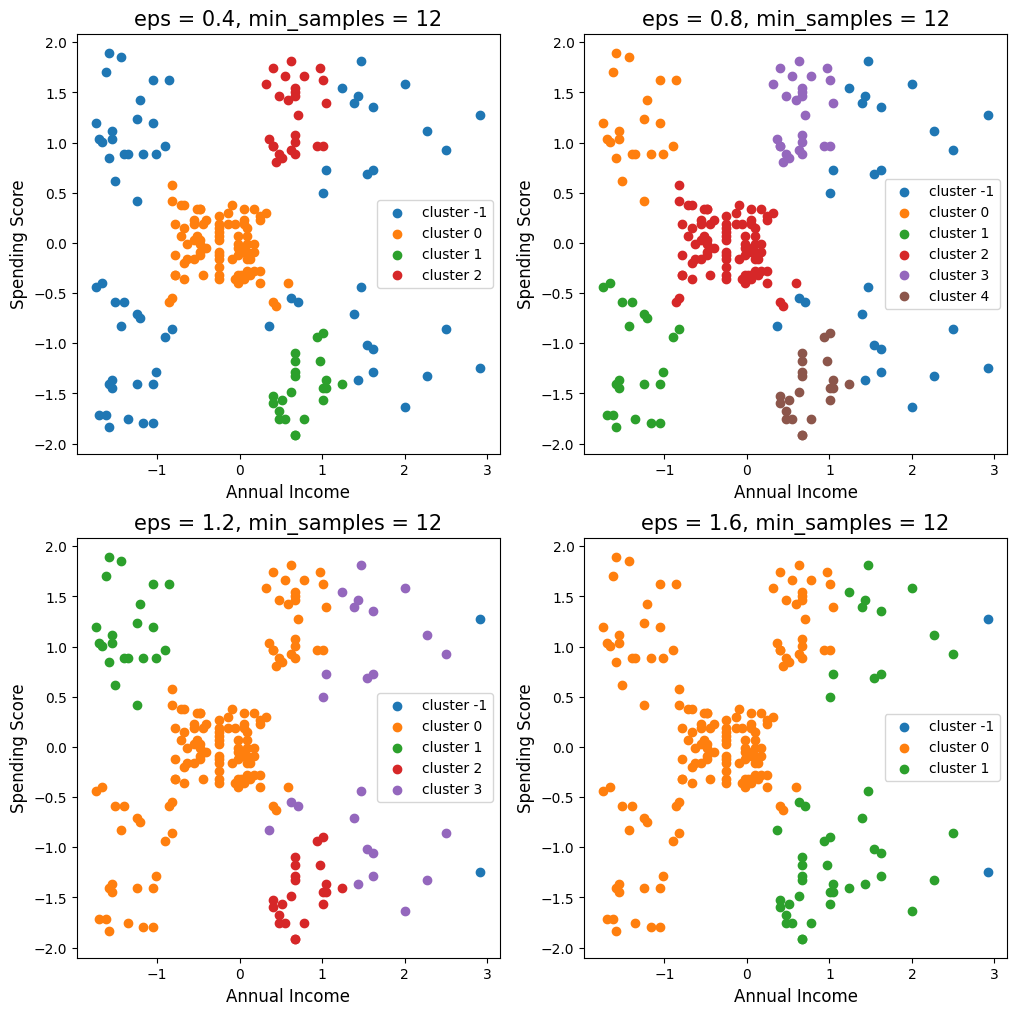

In [22]:
# 다중 플롯 동시 시각화
f, ax = plt.subplots(2, 2)
f.set_size_inches((12, 12))

for i in range(4):
    # epsilon을 증가시키면서 반복
    eps = 0.4 * (i + 1)
    min_samples = 12

    # 군집화 및 시각화 과정 자동화
    model = DBSCAN(eps=eps, min_samples=min_samples)

    model.fit(df_scale)
    df_scale['cluster'] = model.fit_predict(df_scale)

    for j in range(-1, df_scale['cluster'].max() + 1):
        ax[i // 2, i % 2].scatter(df_scale.loc[df_scale['cluster'] == j, 'Annual Income (k$)'], df_scale.loc[df_scale['cluster'] == j, 'Spending Score (1-100)'], 
                        label = 'cluster ' + str(j))

    ax[i // 2, i % 2].legend()
    ax[i // 2, i % 2].set_title('eps = %.1f, min_samples = %d'%(eps, min_samples), size = 15)
    ax[i // 2, i % 2].set_xlabel('Annual Income', size = 12)
    ax[i // 2, i % 2].set_ylabel('Spending Score', size = 12)
plt.show()